### Experimenting with RDkit 

In [1]:
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Descriptors 
from rdkit.Chem import AllChem 
from rdkit import DataStructs
import numpy as np 
from rdkit.Chem import MolFromInchi
from rdkit.Chem import rdMolDescriptors
import pubchempy


## Convering SMILES to molecules 
This process is done computationally where RDKit follows a certain rule to generate molecule. It's a combination of SMILES string parsing, error handling, and etc. It's not as simple as a look up table. 
-  RDKit supports plotting of the chemical formula, but this sometimes is not correct 
-  RDKit generates moleculuar formula along from SMILES strings

**Reading molecules from SMILES strings** and examples with omitted Hydrogen bonds 

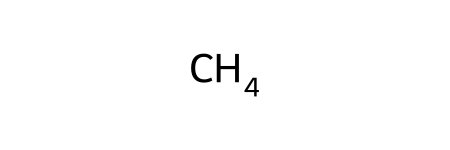

In [10]:
methane= Chem.MolFromSmiles("C")
methane 

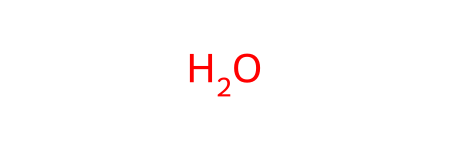

In [11]:
water= Chem.MolFromSmiles("O")
water 

Failed Plotting of RDKit, but it can still get the chemical formula correct 

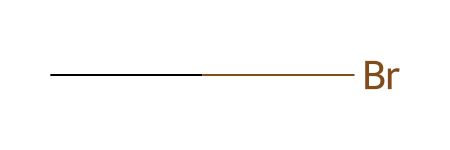

In [21]:
bromemethane= Chem.MolFromSmiles("CBr")
bromemethane

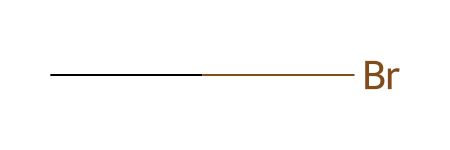

In [ ]:
# attempt using IUPAC name 
bro_2 = MolFromInchi("InChI=1S/CH3Br/c1-2/h1H3")
bro_2

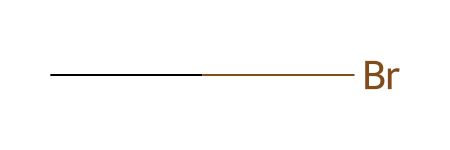

In [ ]:
# explicitly adding hydrogen bonding
bro_3= Chem.MolFromSmiles("[CH3]Br")
bro_3 

In [ ]:
# we can verify the formula of generated molecules
formula = rdMolDescriptors.CalcMolFormula(bromemethane)
print(formula)

CH3Br


CHN


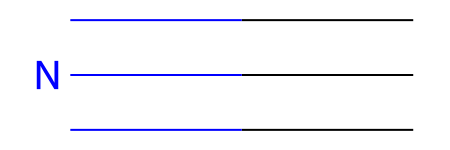

In [28]:
hydrocyanic_acid= Chem.MolFromSmiles("C#N")
Draw.MolToImage(hydrocyanic_acid)
print(rdMolDescriptors.CalcMolFormula(hydrocyanic_acid))
hydrocyanic_acid

**Molecule Representations from SMILES strings might not be generated correctly, but the  chemical formulas are detected correctly**

In [ ]:
results= pubchempy.get_compounds("C#N", namespace="smiles")
results[0]

'CHN'

### RDKit with different SMILES representations 
Does RDKit recognize different SMILES representations as the same molecule? 

2-amino-3-phenylpropanoic acid


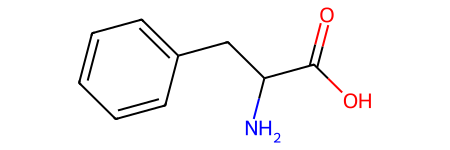

In [ ]:
# canonical representations 
phenylalanine= Chem.MolFromSmiles("C1=CC=C(C=C1)CC(C(=O)O)N")
print(pubchempy.get_compounds("C1=CC=C(C=C1)CC(C(=O)O)N", namespace="smiles")[0].iupac_name)
phenylalanine

(2S)-2-amino-3-phenylpropanoic acid


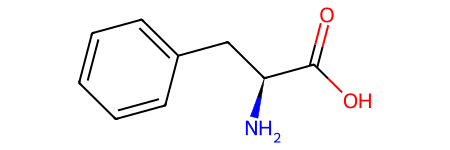

In [7]:
phenylalanine_2= Chem.MolFromSmiles("C1=CC=C(C=C1)C[C@@H](C(=O)O)N")
print(pubchempy.get_compounds("C1=CC=C(C=C1)C[C@@H](C(=O)O)N", namespace="smiles")[0].iupac_name)
phenylalanine_2

2-aminopropanoic acid


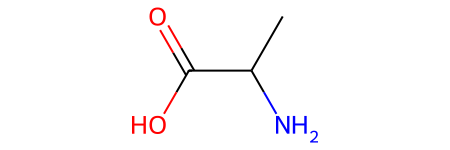

In [ ]:
# canonical SMILES 
alanine_1= Chem.MolFromSmiles("CC(N)C(=O)O")
print(pubchempy.get_compounds("CC(N)C(=O)O", namespace="smiles")[0].iupac_name)
alanine_1

(2S)-2-aminopropanoic acid


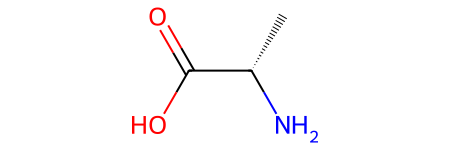

In [9]:
#isomeric SMILES 
alanine_iso = Chem.MolFromSmiles("C[C@H](N)C(=O)O")
print(pubchempy.get_compounds("C[C@H](N)C(=O)O", namespace="smiles")[0].iupac_name)
alanine_iso

In [10]:
from SmilesEnumerator import SmilesEnumerator 
sme= SmilesEnumerator() 
for i in range (5): 
    print(sme.randomize_smiles("CC(N)C(=O)O"))

C(N)(C(O)=O)C
CC(C(=O)O)N
O=C(O)C(N)C
C(C(O)=O)(C)N
C(O)(=O)C(C)N


2-aminopropanoic acid


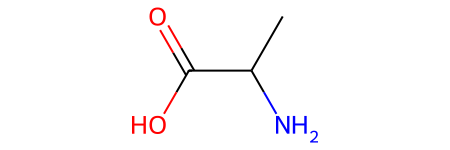

In [11]:
# regular SMILES 
alanine_3= Chem.MolFromSmiles("C(N)(C(O)=O)C")
print(pubchempy.get_compounds("C(N)(C(O)=O)C", namespace="smiles")[0].iupac_name)
alanine_3

2-aminopropanoic acid


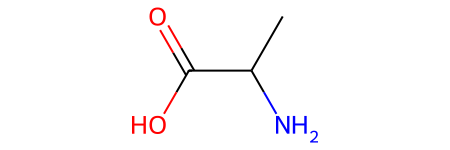

In [12]:
# regular SMILES 
alanine_4= Chem.MolFromSmiles("CC(C(=O)O)N")
print(pubchempy.get_compounds("CC(C(=O)O)N", namespace="smiles")[0].iupac_name)
alanine_4

**RDKit can recognize isomeric, canonical and regular SMILES of the molecule**